<a href="https://colab.research.google.com/github/Rajesh2015/python-for-datascience/blob/main/Copy_of_Python_Bootcamp_Week_3_June_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import teh basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('mpg')

In [ ]:
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
107,18.0,6,232.0,100.0,2789,15.0,73,usa,amc gremlin
136,16.0,8,302.0,140.0,4141,14.0,74,usa,ford gran torino
377,31.0,4,91.0,68.0,1970,17.6,82,japan,mazda glc custom
63,14.0,8,400.0,175.0,4385,12.0,72,usa,pontiac catalina
289,16.9,8,350.0,155.0,4360,14.9,79,usa,buick estate wagon (sw)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df['name'].nunique()

305

In [ ]:
df['origin'].nunique()

3

In [ ]:
df['origin'].value_counts(normalize = True)

origin
usa       0.625628
japan     0.198492
europe    0.175879
Name: proportion, dtype: float64

In [ ]:
df.groupby(['origin'])['mpg'].median()

origin
europe    26.5
japan     31.6
usa       18.5
Name: mpg, dtype: float64

In [ ]:
df.groupby(['origin'])['mpg'].mean().sort_values(ascending = False)

origin
japan     30.450633
europe    27.891429
usa       20.083534
Name: mpg, dtype: float64

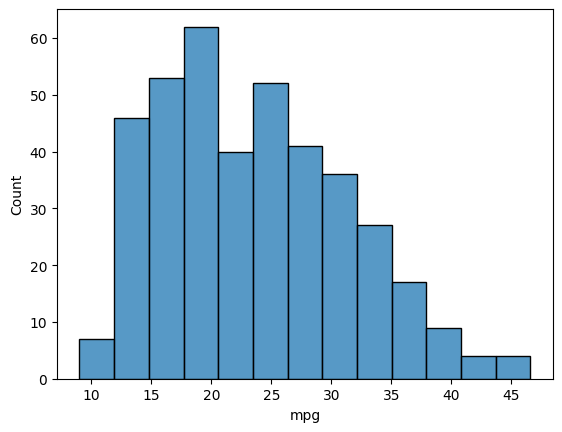

In [ ]:
#Univariate(One variable) - Numerical variable: histogram, boxplot, density plot
sns.histplot(x = 'mpg', data = df);

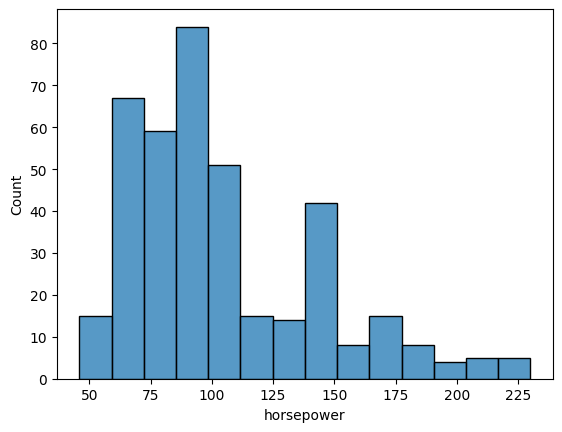

In [ ]:
sns.histplot(x = 'horsepower', data = df);

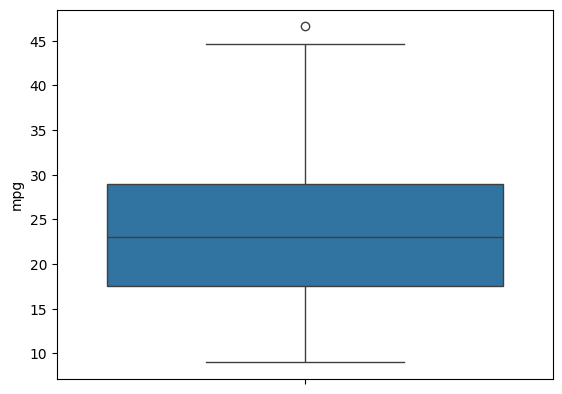

In [ ]:
sns.boxplot(y = 'mpg', data = df);
# LL = Q1 - 1.5*IQR where Q1 = 25th percentile, Q3 = 75th percentile, IQR = Q3 - Q1
# UL = Q3 + 1.5*IQR

In [ ]:
df['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

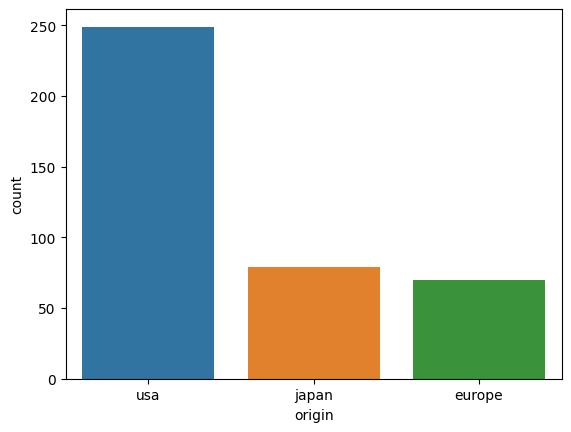

In [ ]:
#Univariate(One variable) - Categorical variable: countplot, pie chart
sns.countplot(x = 'origin', data = df, hue = 'origin');

In [ ]:
df['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [ ]:
df['origin'].value_counts().index

Index(['usa', 'japan', 'europe'], dtype='object', name='origin')

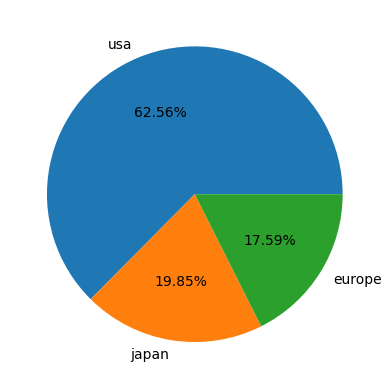

In [ ]:
plt.pie(df['origin'].value_counts(), labels = df['origin'].value_counts().index, autopct = '%0.2f%%');

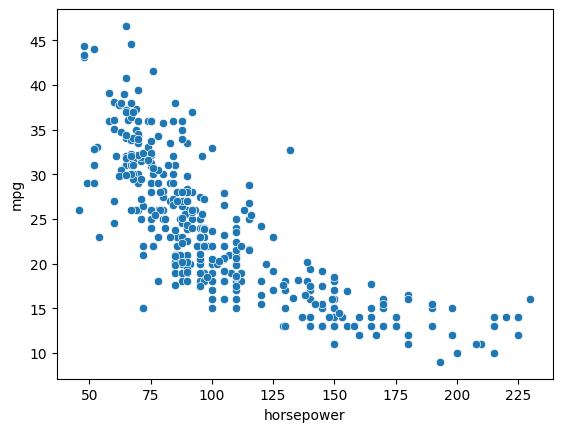

In [ ]:
# Bivariate analysis(two variables) - (numeric, numeric): scatterplot
sns.scatterplot(x = 'horsepower', y = 'mpg', data = df);

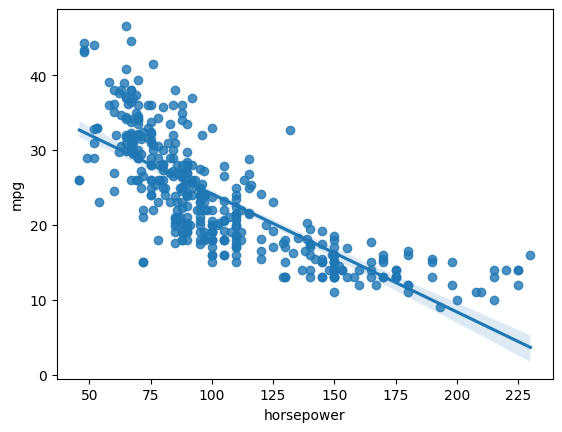

In [ ]:
sns.regplot(x = 'horsepower', y = 'mpg', data = df);

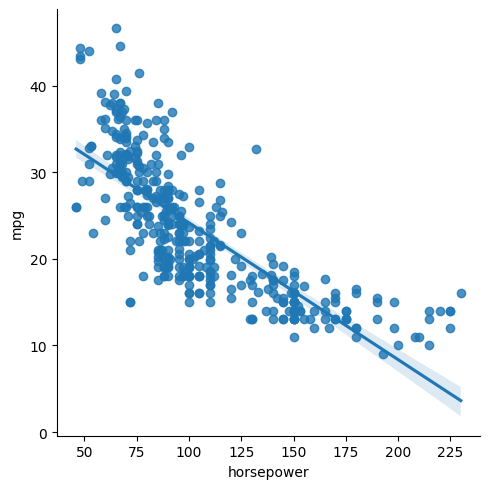

In [ ]:
sns.lmplot(x = 'horsepower', y = 'mpg', data = df);

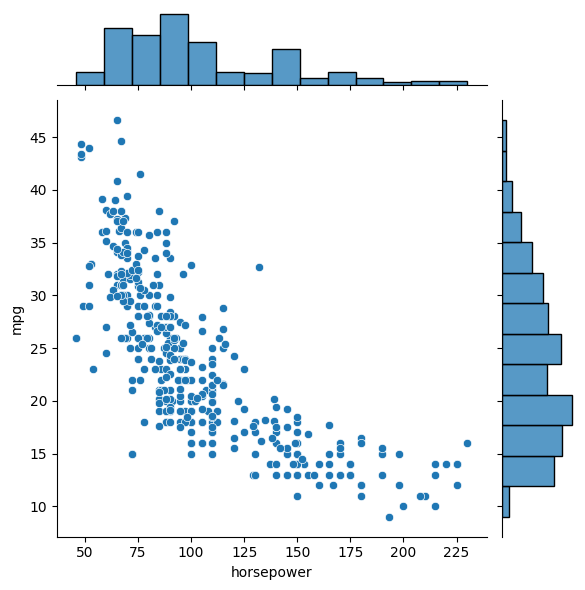

In [ ]:
sns.jointplot(x = 'horsepower', y = 'mpg', data = df);

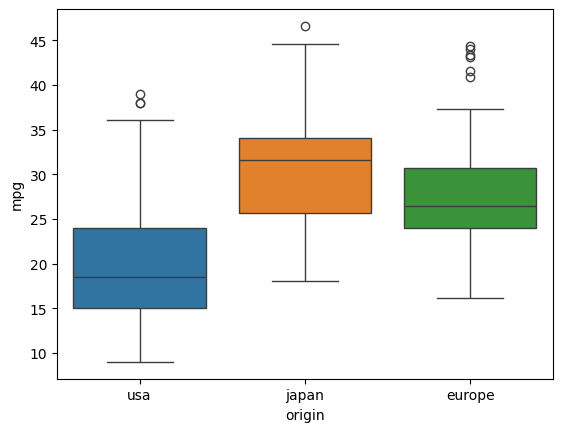

In [ ]:
# Bivariate analysis(two variables) - (categorical, numerical): barplot, boxplot(conditional),
sns.boxplot(x = 'origin', y = 'mpg', data = df, hue = 'origin');

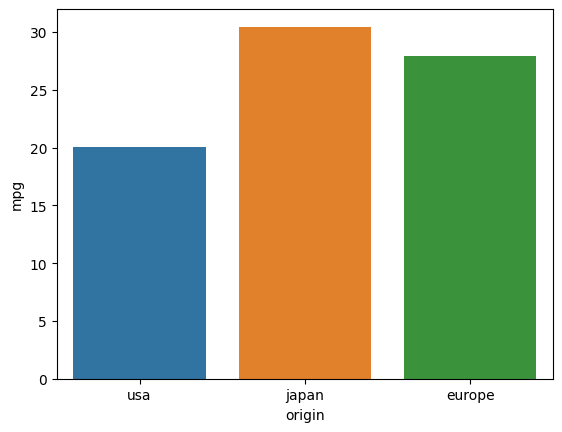

In [ ]:
sns.barplot(x = 'origin', y = 'mpg', data = df, hue = 'origin', errorbar = None);

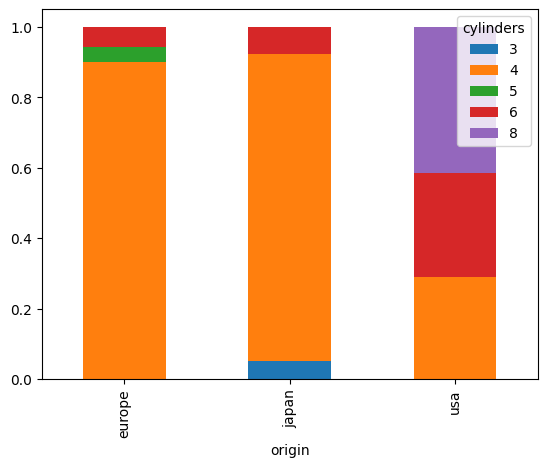

In [ ]:
# Bivariate analysis(two variables) - (categorical, categorical): stacked bar chart
ct_norm = pd.crosstab(df['origin'], df['cylinders'], normalize = 'index')
ct_norm.plot.bar(stacked = True);

In [ ]:
ct_norm

cylinders,3,4,5,6,8
origin,,,,,
europe,0.000000,0.900000,0.042857,0.057143,0.000000
japan,0.050633,0.873418,0.000000,0.075949,0.000000
usa,0.000000,0.289157,0.000000,0.297189,0.413655


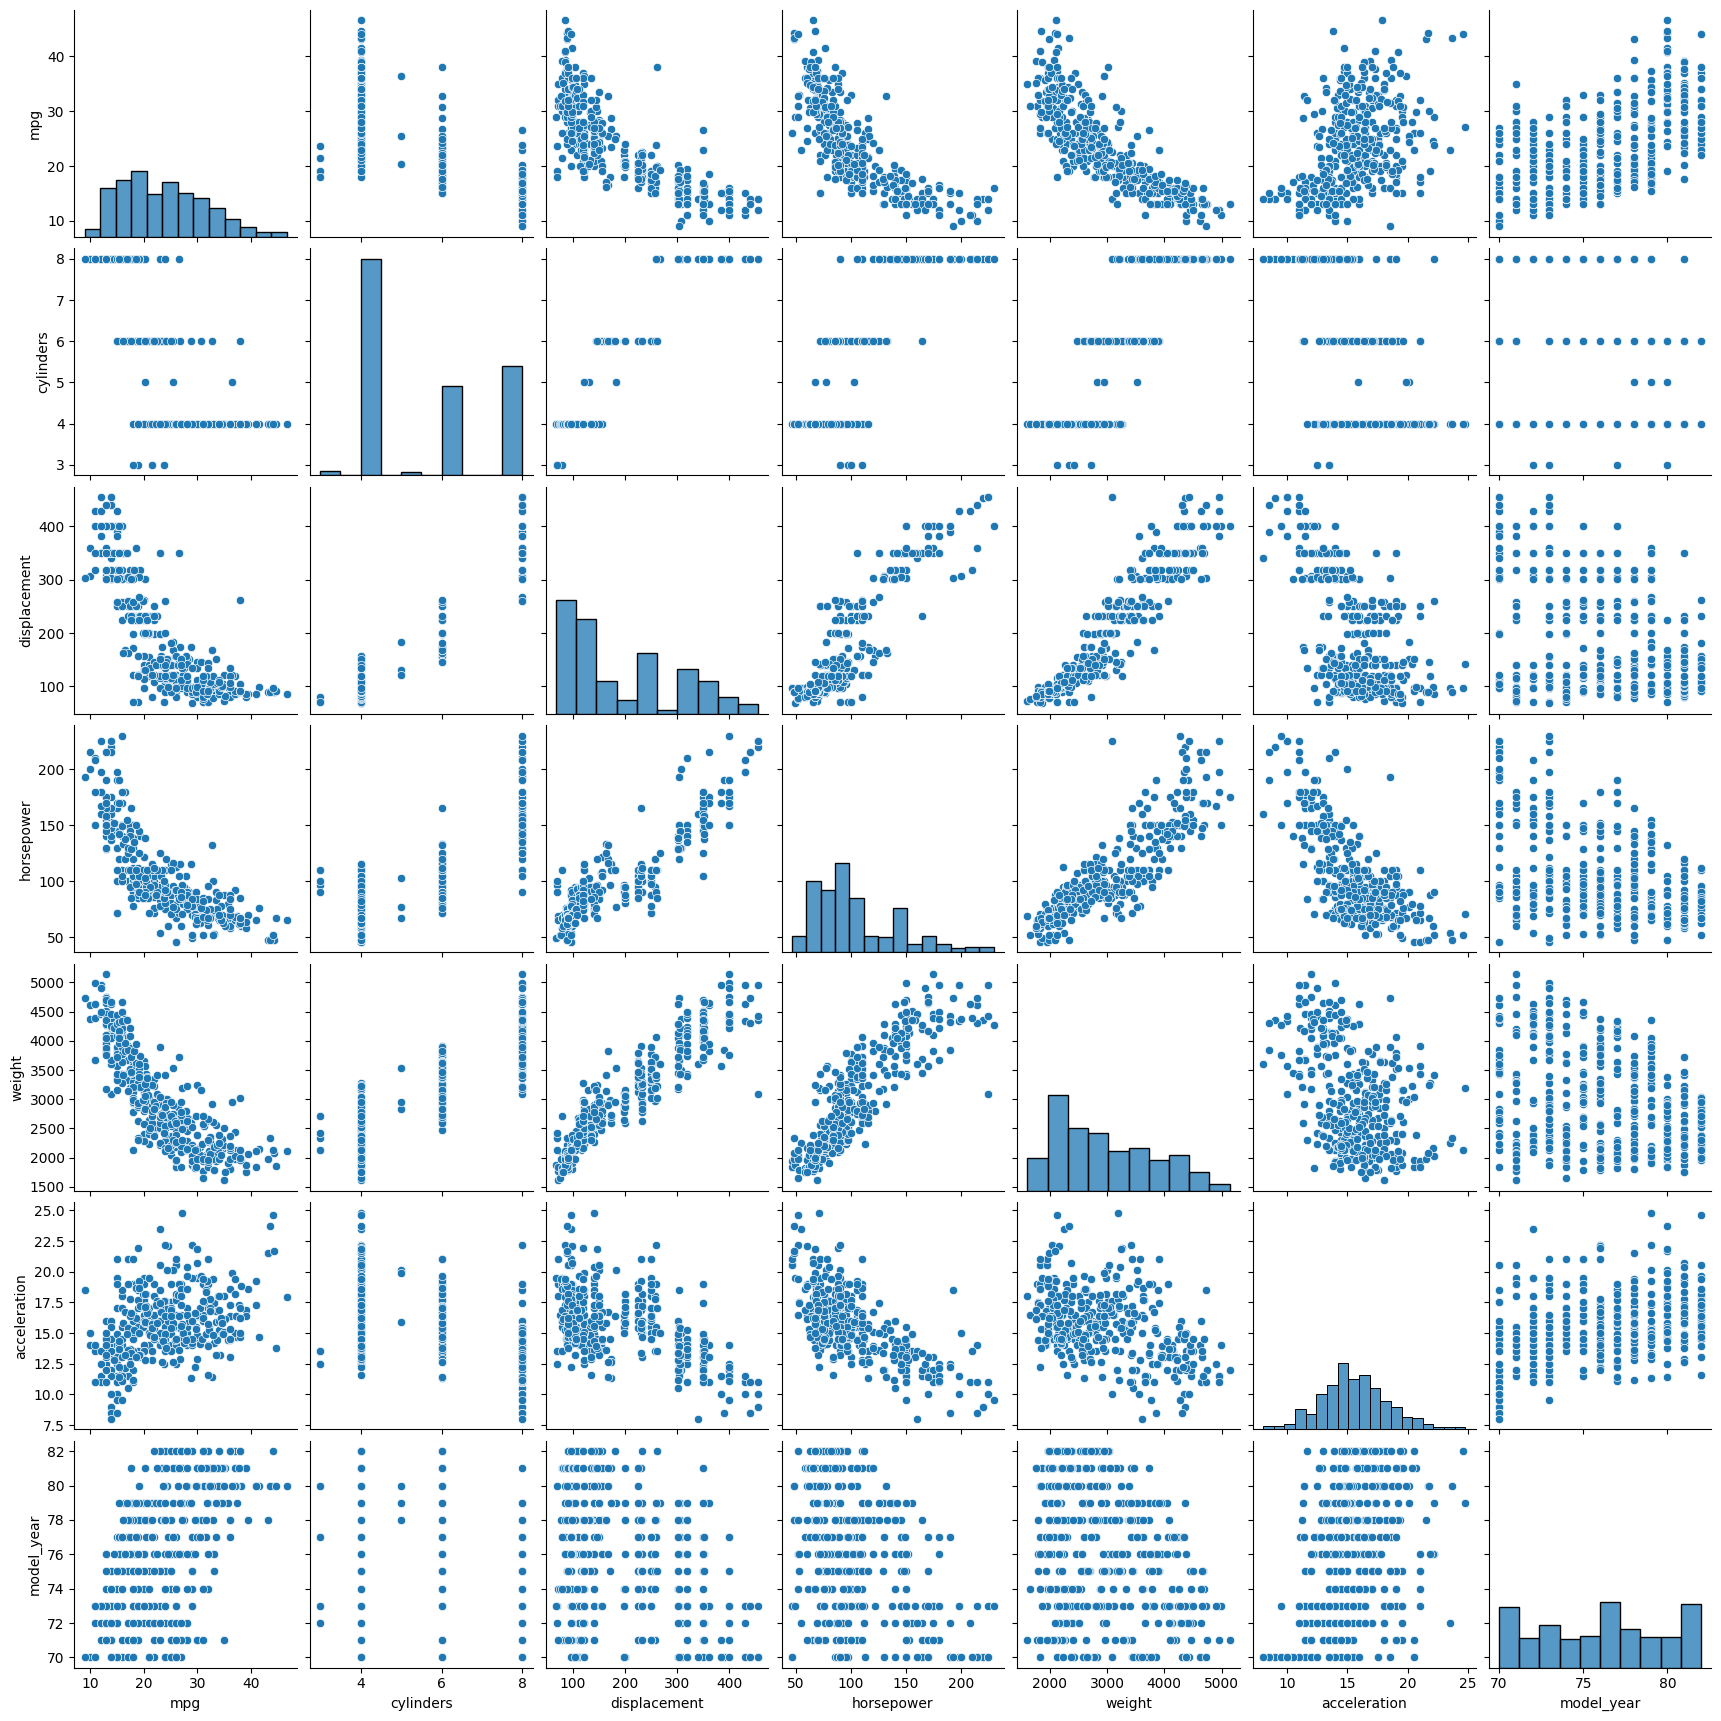

In [ ]:
sns.pairplot(df);

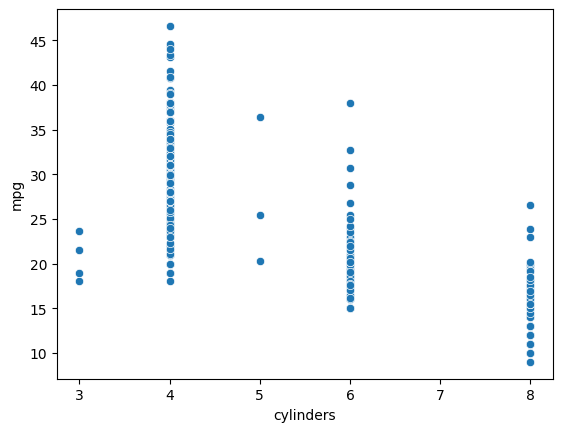

In [ ]:
sns.scatterplot(x = 'cylinders', y = 'mpg', data = df);

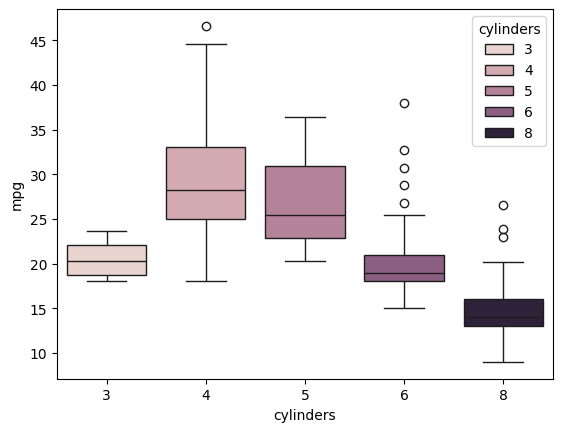

In [ ]:
sns.boxplot(x = 'cylinders', y = 'mpg', data = df, hue = 'cylinders');

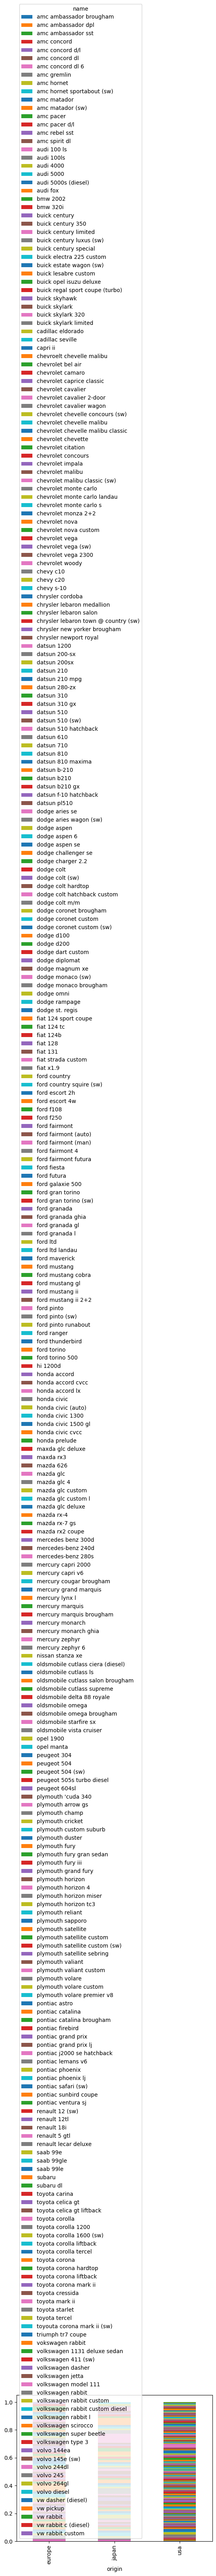

In [ ]:
ct_norm = pd.crosstab(df['origin'], df['name'], normalize = 'index')
ct_norm.plot.bar(stacked = True);

In [ ]:
df1 = df.drop(['origin', 'name'], axis = 1)
df1.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


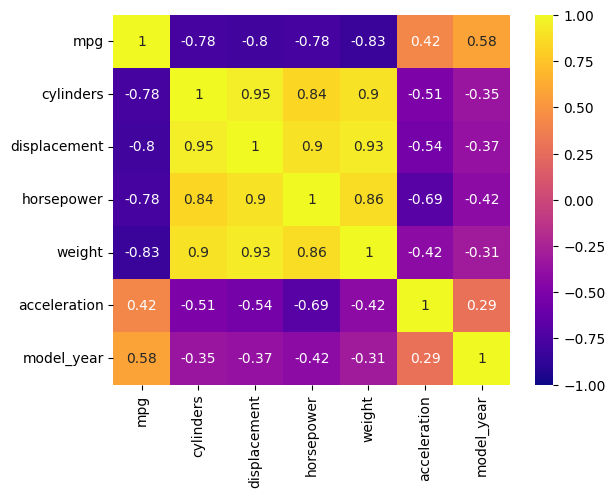

In [ ]:
sns.heatmap(df1.corr(), cmap = 'plasma', vmin = -1, vmax = 1, annot = True);

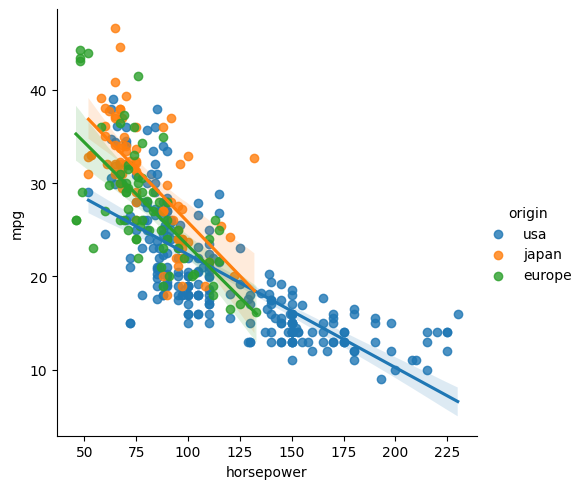

In [ ]:
sns.lmplot(x = 'horsepower', y = 'mpg', data = df, hue = 'origin')

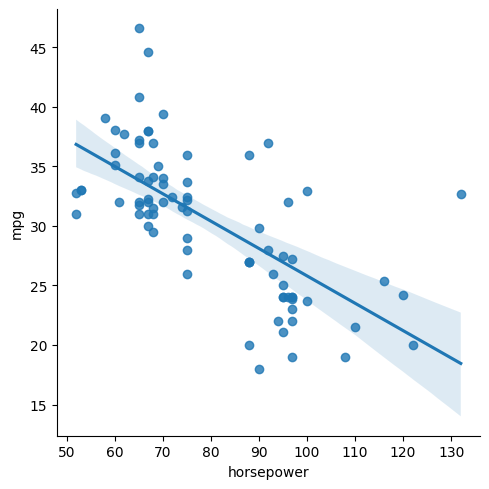

In [ ]:
sns.lmplot(x = 'horsepower', y = 'mpg', data = df[df['origin']== 'japan'])

In [ ]:
num = 35821
for i in range(1, 11):
  print(num, "x", i, "=", num*i)

35821 x 1 = 35821
35821 x 2 = 71642
35821 x 3 = 107463
35821 x 4 = 143284
35821 x 5 = 179105
35821 x 6 = 214926
35821 x 7 = 250747
35821 x 8 = 286568
35821 x 9 = 322389
35821 x 10 = 358210


In [ ]:
df.select_dtypes(exclude = 'object').columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

In [ ]:
numerics = df.select_dtypes(exclude = 'object').columns
for i in numerics:
  print("The mean of", i, "is", df[i].mean().round(2))

The mean of mpg is 23.51
The mean of cylinders is 5.45
The mean of displacement is 193.43
The mean of horsepower is 104.47
The mean of weight is 2970.42
The mean of acceleration is 15.57
The mean of model_year is 76.01


In [ ]:
my_list = ['a', 'b', 'c']
for i, j in enumerate(my_list):
  print(i, j)

0 a
1 b
2 c


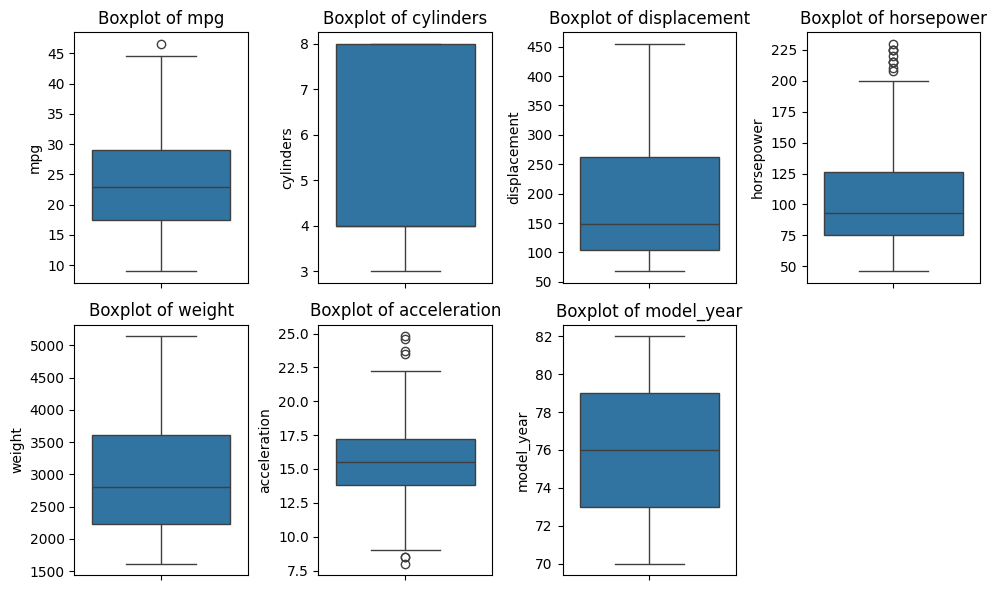

In [ ]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerics):
  plt.subplot(2, 4, i+1)
  sns.boxplot(y = col, data = df)
  plt.title(f"Boxplot of {col}")
plt.tight_layout()

In [ ]:
numerics = []
for i in df.columns:
  if df[i].dtype != 'object':
    numerics.append(i)
numerics

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year']

In [ ]:
pg = sns.load_dataset('penguins')

In [ ]:
pg.shape

(344, 7)

In [ ]:
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
pg.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

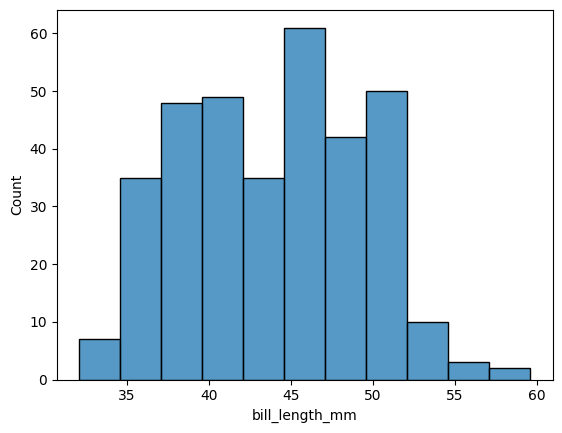

In [ ]:
sns.histplot(x = 'bill_length_mm', data = pg);

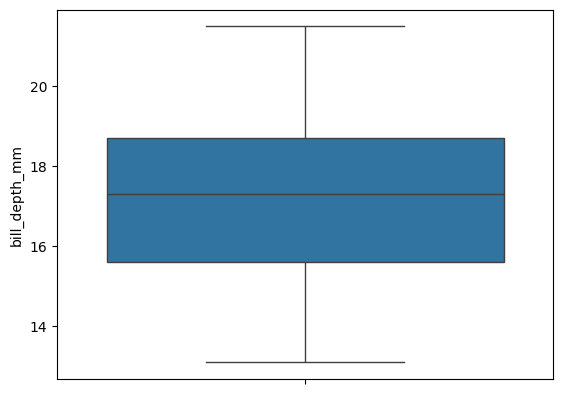

In [ ]:
sns.boxplot(y = 'bill_depth_mm', data = pg);

In [ ]:
pg['island'].nunique()

3

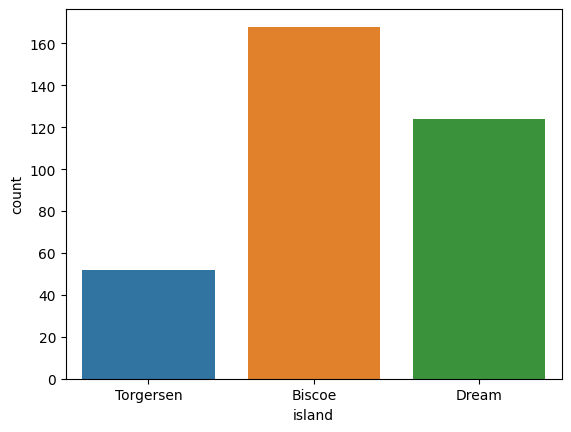

In [ ]:
sns.countplot(x = 'island', data = pg, hue = 'island');

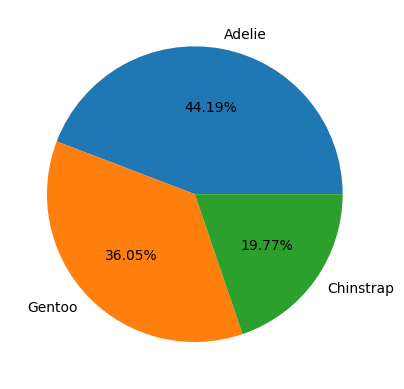

In [ ]:
plt.pie(pg['species'].value_counts(), labels = pg['species'].value_counts().index, autopct = '%0.2f%%');

In [ ]:
pg.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

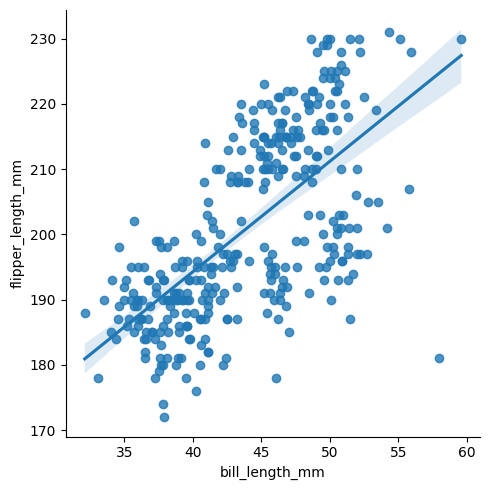

In [ ]:
sns.lmplot(x = 'bill_length_mm', y = 'flipper_length_mm', data = pg)

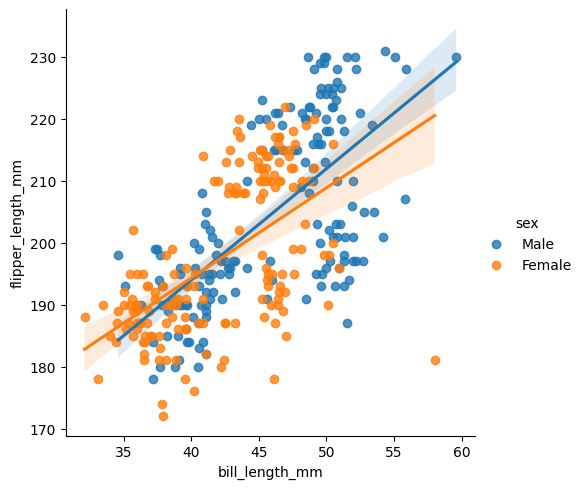

In [ ]:
sns.lmplot(x = 'bill_length_mm', y = 'flipper_length_mm', data = pg, hue = 'sex')

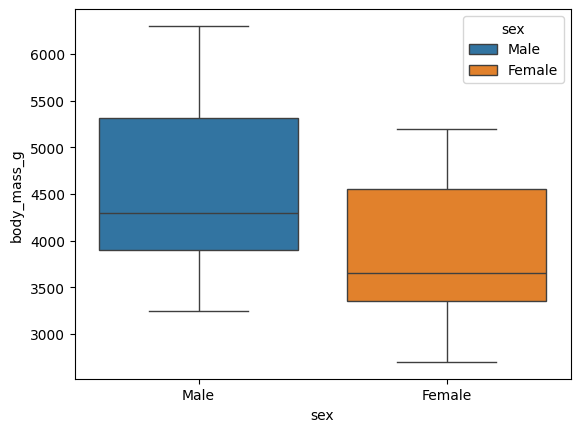

In [ ]:
sns.boxplot(x = 'sex', y = 'body_mass_g', data = pg, hue = 'sex');

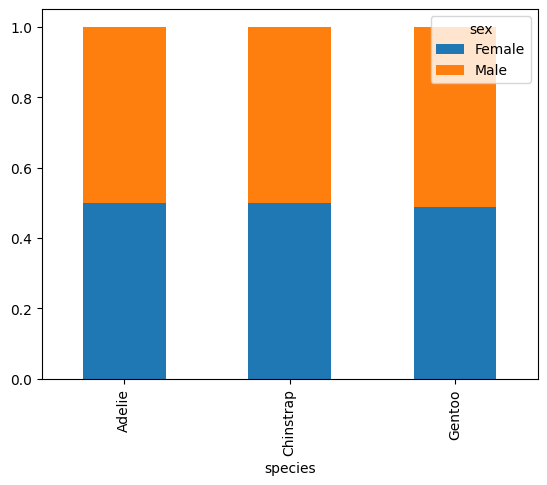

In [ ]:
pd.crosstab(pg['species'], pg['sex'], normalize = 'index').plot.bar(stacked = True);